In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['language_data.csv']


In [2]:
df = pd.read_csv('../input/language_data.csv')
df.head()

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,id,date,time,gender,age,natlangs,primelangs,dyslexia,psychiatric,...,q34_6,q34_8,q35_1,q35_2,q35_4,q35_5,q35_7,q35_8,correct,elogit
0,1,2.0,2014-05-29,01:00:55,male,31,English,English,0,0,...,1,1,1,1,1,1,1,1,0.978947,3.621671
1,2,3.0,2014-05-29,01:01:03,male,30,English,English,0,1,...,1,1,1,1,1,1,1,1,1.000000,5.252273
2,3,3.0,2014-05-29,01:01:03,male,30,English,English,0,1,...,1,1,1,1,1,1,1,1,1.000000,5.252273
3,4,4.0,2014-05-29,01:01:13,male,19,English,English,0,0,...,1,1,1,1,1,0,1,1,0.905263,2.208853
4,5,5.0,2014-05-29,01:01:19,male,20,"Chinese/Mandarin, English","Chinese/Mandarin, English",0,0,...,1,1,1,1,1,0,1,1,0.947368,2.800602


In [3]:
df.describe()

,Unnamed: 0,id,age,dyslexia,psychiatric,Eng_start,Eng_country_yrs,house_Eng,dictionary,already_participated,...,q34_6,q34_8,q35_1,q35_2,q35_4,q35_5,q35_7,q35_8,correct,elogit
count,669498.000000,6.694980e+05,669498.000000,669498.0,669498.000000,669498.000000,380078.000000,380078.000000,669498.0,669498.0,...,669498.000000,669498.000000,669498.000000,669498.000000,669498.000000,669498.000000,669498.000000,669498.000000,669498.000000,669498.000000
mean,339976.546732,1.019469e+06,29.971137,0.0,0.030732,5.184195,4.438086,0.194563,0.0,0.0,...,0.860397,0.963963,0.906467,0.922775,0.907354,0.964441,0.987432,0.843157,0.937698,3.027669
std,196322.745202,9.823833e+05,11.250877,0.0,0.172591,5.696445,10.183989,0.395864,0.0,0.0,...,0.346575,0.186383,0.291178,0.266948,0.289935,0.185189,0.111399,0.363653,0.060905,1.011066
min,1.000000,2.000000e+00,7.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.063158,-2.622436
25%,170188.250000,4.008032e+05,22.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.915789,2.331573
50%,339746.500000,6.650680e+05,27.000000,0.0,0.000000,5.000000,0.000000,0.000000,0.0,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.957895,3.012262
75%,509647.750000,1.166975e+06,35.000000,0.0,0.000000,10.000000,2.000000,0.000000,0.0,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.978947,3.621671
max,680341.000000,3.678506e+06,89.000000,0.0,1.000000,74.000000,88.000000,1.000000,0.0,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.252273


In [4]:
pd.set_option('display.max_columns', 500)

In [5]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669498 entries, 0 to 669497
Data columns (total 128 columns):
Unnamed: 0              int64
id                      float64
date                    object
time                    object
gender                  object
age                     int64
natlangs                object
primelangs              object
dyslexia                int64
psychiatric             int64
education               object
tests                   object
Eng_start               int64
Eng_country_yrs         float64
house_Eng               float64
dictionary              int64
already_participated    int64
countries               object
currcountry             object
US_region               object
UK_region               object
Can_region              object
Ebonics                 object
Ir_region               object
UK_constituency         object
nat_Eng                 int64
prime_Eng               int64
speaker_cat             object
type                    ob

In [6]:
df['education'].describe()

count              669498
unique                 92
top       Graduate Degree
freq               235096
Name: education, dtype: object

In [7]:
df['education'].value_counts().head(30)

Graduate Degree                                                    235096
Undergraduate Degree (3-5 years higher ed)                         175223
Some Undergrad (higher ed)                                          94240
High School Degree (12-13 years)                                    78816
Some Graduate School                                                54048
Haven't Finished High School (less than 13 years ed)                24340
Didn't Finish High School (less than 13 years ed)                    7417
Lisans Derecesi (3-5 yÄ±l daha yÃ¼ksek ed)                             45
BazÄ± Ãœniversite (daha yÃ¼ksek ed)                                    30
Lise Derecesi (12-13 yaÅŸ)                                             17
Egyetemi diploma (3-5 évvel magasabb ed)                               15
YÃ¼ksek Lisans                                                         15
ÐžÐ±Ñ€Ð°Ð·Ð¾Ð²Ð°Ð½Ð¸Ðµ, Ð¸Ð½ÑÑ‚Ð¸Ñ‚ÑƒÑ‚                               14
Néhány Undergrad (magasabb ed)        

Questions:
* How education degree affects english competency for non-native speakers?
* does language learning learning shows difference based on gender?
* What is the effect of number of years living in English-speaking on country on English competency.
* Does subject living with native English speaker has effect on English competency?
* Are people with certain primary language is better in learning English?



Data cleaning:
* Remove cells on questions asked
* remove regions column
* remove subjects with psychological disorder -- dyslexia, psychiatric

Remove cells q1, q2...

In [8]:
df.columns

Index(['Unnamed: 0', 'id', 'date', 'time', 'gender', 'age', 'natlangs',
       'primelangs', 'dyslexia', 'psychiatric',
       ...
       'q34_6', 'q34_8', 'q35_1', 'q35_2', 'q35_4', 'q35_5', 'q35_7', 'q35_8',
       'correct', 'elogit'],
      dtype='object', length=128)

In [9]:
i = 0

for col in df.columns:
    print(i, col)
    i+=1

0 Unnamed: 0
1 id
2 date
3 time
4 gender
5 age
6 natlangs
7 primelangs
8 dyslexia
9 psychiatric
10 education
11 tests
12 Eng_start
13 Eng_country_yrs
14 house_Eng
15 dictionary
16 already_participated
17 countries
18 currcountry
19 US_region
20 UK_region
21 Can_region
22 Ebonics
23 Ir_region
24 UK_constituency
25 nat_Eng
26 prime_Eng
27 speaker_cat
28 type
29 Lived_Eng_per
30 Eng_little
31 q1
32 q2
33 q3
34 q5
35 q6
36 q7
37 q9_1
38 q9_4
39 q10_2
40 q10_4
41 q11_3
42 q11_4
43 q12_1
44 q12_2
45 q12_4
46 q13_3
47 q13_4
48 q14_3
49 q14_4
50 q15_1
51 q15_2
52 q15_3
53 q16_3
54 q16_4
55 q17_1
56 q17_3
57 q17_4
58 q18_2
59 q18_3
60 q18_4
61 q19_1
62 q19_2
63 q19_3
64 q19_4
65 q20_1
66 q20_2
67 q20_3
68 q20_4
69 q21_1
70 q21_2
71 q21_3
72 q21_4
73 q22_1
74 q22_2
75 q22_3
76 q22_4
77 q23_3
78 q23_4
79 q24_1
80 q24_2
81 q24_3
82 q24_4
83 q25_1
84 q25_2
85 q25_3
86 q25_4
87 q26_1
88 q26_2
89 q26_3
90 q26_4
91 q27_1
92 q27_2
93 q27_3
94 q27_4
95 q28_1
96 q28_2
97 q29_1
98 q29_2
99 q29_3
100 q29_4

In [10]:
df.drop(axis=1, columns = [df.columns[col_no] for col_no in range(31,126)], inplace = True)

In [11]:
df.shape

(669498, 33)

In [12]:
df['tests'].value_counts().head()

,WhichEnglish     661043
1,WhichEnglish      8455
Name: tests, dtype: int64

In [13]:
df.drop(axis=1, columns = ['tests','US_region','UK_region', 'Can_region','Ir_region', 'UK_constituency'], inplace = True)

In [14]:
df.shape

(669498, 27)

In [15]:
df['natlangs'].value_counts()

English                                                                                             249749
Finnish                                                                                              39962
Turkish                                                                                              36239
German                                                                                               24995
Russian                                                                                              22834
Hungarian                                                                                            22108
Polish                                                                                               18737
Dutch                                                                                                18142
Spanish                                                                                              17109
Swedish                              

In [16]:
df['nat_Eng'].value_counts()

df['dyslexia'].value_counts()
df['psychiatric'].value_counts()

0    648923
1     20575
Name: psychiatric, dtype: int64

In [17]:
df.drop(axis=1, columns = ['dyslexia'], inplace = True)


In [18]:
print(df.shape)
print(df.columns)

(669498, 26)
Index(['Unnamed: 0', 'id', 'date', 'time', 'gender', 'age', 'natlangs',
       'primelangs', 'psychiatric', 'education', 'Eng_start',
       'Eng_country_yrs', 'house_Eng', 'dictionary', 'already_participated',
       'countries', 'currcountry', 'Ebonics', 'nat_Eng', 'prime_Eng',
       'speaker_cat', 'type', 'Lived_Eng_per', 'Eng_little', 'correct',
       'elogit'],
      dtype='object')


In [19]:
df['already_participated'].value_counts()

0    669498
Name: already_participated, dtype: int64

In [20]:
df.drop(axis=1, columns = ['already_participated'], inplace = True)
df.columns

Index(['Unnamed: 0', 'id', 'date', 'time', 'gender', 'age', 'natlangs',
       'primelangs', 'psychiatric', 'education', 'Eng_start',
       'Eng_country_yrs', 'house_Eng', 'dictionary', 'countries',
       'currcountry', 'Ebonics', 'nat_Eng', 'prime_Eng', 'speaker_cat', 'type',
       'Lived_Eng_per', 'Eng_little', 'correct', 'elogit'],
      dtype='object')

In [21]:
print(df['dictionary'].describe())
print(df['dictionary'].value_counts())

count    669498.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: dictionary, dtype: float64
0    669498
Name: dictionary, dtype: int64


Therefore, no one used dictionary. So we can remove that coloumn

In [22]:
df.drop(axis=1, columns = ['dictionary'], inplace = True)
df.columns

Index(['Unnamed: 0', 'id', 'date', 'time', 'gender', 'age', 'natlangs',
       'primelangs', 'psychiatric', 'education', 'Eng_start',
       'Eng_country_yrs', 'house_Eng', 'countries', 'currcountry', 'Ebonics',
       'nat_Eng', 'prime_Eng', 'speaker_cat', 'type', 'Lived_Eng_per',
       'Eng_little', 'correct', 'elogit'],
      dtype='object')

Check for NaN vaulus

In [23]:
df.isnull().sum()

Unnamed: 0              0
id                      0
date                    0
time                    0
gender                  0
age                     0
natlangs             8018
primelangs           7822
psychiatric             0
education               0
Eng_start               0
Eng_country_yrs    289420
house_Eng          289420
countries           29591
currcountry         33889
Ebonics            500383
nat_Eng                 0
prime_Eng               0
speaker_cat             0
type               271943
Lived_Eng_per      300756
Eng_little         111233
correct                 0
elogit                  0
dtype: int64

In [24]:
df.head(20)

,Unnamed: 0,id,date,time,gender,age,natlangs,primelangs,psychiatric,education,Eng_start,Eng_country_yrs,house_Eng,countries,currcountry,Ebonics,nat_Eng,prime_Eng,speaker_cat,type,Lived_Eng_per,Eng_little,correct,elogit
0,1,2.0,2014-05-29,01:00:55,male,31,English,English,0,Graduate Degree,0,NaN,NaN,United States,United States,0,1,1,native,United States,NaN,monoeng,0.978947,3.621671
1,2,3.0,2014-05-29,01:01:03,male,30,English,English,1,Undergraduate Degree (3-5 years higher ed),0,NaN,NaN,"Colombia, Japan, United Kingdom",Colombia,NaN,1,1,native,NaN,NaN,monoeng,1.000000,5.252273
2,3,3.0,2014-05-29,01:01:03,male,30,English,English,1,Undergraduate Degree (3-5 years higher ed),0,NaN,NaN,"Colombia, Japan, United Kingdom",Colombia,NaN,1,1,native,NaN,NaN,monoeng,1.000000,5.252273
3,4,4.0,2014-05-29,01:01:13,male,19,English,English,0,Some Undergrad (higher ed),0,NaN,NaN,United States,United States,1,1,1,native,Ebonics,NaN,monoeng,0.905263,2.208853
4,5,5.0,2014-05-29,01:01:19,male,20,"Chinese/Mandarin, English","Chinese/Mandarin, English",0,High School Degree (12-13 years),0,NaN,NaN,Singapore,Singapore,NaN,1,1,native,NaN,NaN,bileng,0.947368,2.800602
5,6,6.0,2014-05-29,01:01:20,female,58,English,English,0,Some Undergrad (higher ed),0,NaN,NaN,United States,United States,0,1,1,native,United States,NaN,monoeng,0.957895,3.012262
6,7,6.0,2014-05-29,01:01:20,female,58,English,English,0,Some Undergrad (higher ed),0,NaN,NaN,United States,United States,0,1,1,native,United States,NaN,monoeng,0.989474,4.143135
7,8,7.0,2014-05-29,01:01:22,female,22,English,English,0,Undergraduate Degree (3-5 years higher ed),0,NaN,NaN,United States,United States,0,1,1,native,United States,NaN,monoeng,0.978947,3.621671
8,9,9.0,2014-05-29,01:02:09,male,53,Tagalog,English,0,Undergraduate Degree (3-5 years higher ed),0,53.0,1.0,United States,United States,0,0,0,native,NaN,1.000000,NaN,0.947368,2.800602
9,10,11.0,2014-05-29,01:02:12,female,25,"Chinese/Mandarin, Chinese/Wu/Shanghainese",English,0,Some Graduate School,8,17.0,0.0,"China, Singapore, United States",United States,0,0,0,late,NaN,1.000000,lot,0.978947,3.621671


In [25]:
df.dropna(subset=['natlangs', 'primelangs'], inplace = True)

In [26]:
df.isnull().sum()

Unnamed: 0              0
id                      0
date                    0
time                    0
gender                  0
age                     0
natlangs                0
primelangs              0
psychiatric             0
education               0
Eng_start               0
Eng_country_yrs    289079
house_Eng          289079
countries           29458
currcountry         33699
Ebonics            493451
nat_Eng                 0
prime_Eng               0
speaker_cat             0
type               264161
Lived_Eng_per      300224
Eng_little         108837
correct                 0
elogit                  0
dtype: int64

In [27]:
def replace_education(x):
    if x == "Haven't Finished High School (less than 13 years ed)":
        return "below high-school"
    elif x == "Didn't Finish High School (less than 13 years ed)":
        return 'below high-school'
    elif x == "High School Degree (12-13 years)":
        return 'high school passed'
    elif x == "Some Undergrad (higher ed)":
        return 'undergrad studying'
    elif x == "Undergraduate Degree (3-5 years higher ed)":
        return 'undergrad passed'
    elif x == "Some Graduate School":
        return 'grad studying'
    elif x == "Graduate Degree":
        return 'grad passed'
    else:
        return 'unknown'
df['education'] = df['education'].apply(replace_education)

In [28]:
df['education'].value_counts()

grad passed           231938
undergrad passed      173436
undergrad studying     93358
high school passed     77567
grad studying          53337
below high-school      31529
unknown                  315
Name: education, dtype: int64

collect non native speakers

In [29]:
df['nat_Eng'].value_counts()

0    369850
1    291630
Name: nat_Eng, dtype: int64

In [30]:
non_natives = df[df['nat_Eng'] == 0]

In [31]:
non_natives.shape

(369850, 24)

In [32]:
non_natives.isnull().sum()

Unnamed: 0              0
id                      0
date                    0
time                    0
gender                  0
age                     0
natlangs                0
primelangs              0
psychiatric             0
education               0
Eng_start               0
Eng_country_yrs     13381
house_Eng           13381
countries           16201
currcountry         18433
Ebonics            327634
nat_Eng                 0
prime_Eng               0
speaker_cat             0
type               130550
Lived_Eng_per       22941
Eng_little         104121
correct                 0
elogit                  0
dtype: int64

In [33]:
non_natives.drop(axis=1, columns = ['Ebonics'])
non_natives.isnull().sum()

Unnamed: 0              0
id                      0
date                    0
time                    0
gender                  0
age                     0
natlangs                0
primelangs              0
psychiatric             0
education               0
Eng_start               0
Eng_country_yrs     13381
house_Eng           13381
countries           16201
currcountry         18433
Ebonics            327634
nat_Eng                 0
prime_Eng               0
speaker_cat             0
type               130550
Lived_Eng_per       22941
Eng_little         104121
correct                 0
elogit                  0
dtype: int64

- Rename education status
- only collect non psych.
- compare with correct 

In [34]:
non_natives['education'].value_counts()

grad passed           153849
undergrad passed       82911
high school passed     49215
undergrad studying     37055
grad studying          31915
below high-school      14598
unknown                  307
Name: education, dtype: int64

In [35]:
edu_data = non_natives[(non_natives['psychiatric']) == 0 ]

In [36]:
edu_data = edu_data[edu_data['education'] != 'unknown']

In [37]:
edu_data['education'].value_counts()

grad passed           149854
undergrad passed       80790
high school passed     47409
undergrad studying     35765
grad studying          30658
below high-school      13947
Name: education, dtype: int64

In [38]:
edu_data['psychiatric'].value_counts()


0    358423
Name: psychiatric, dtype: int64

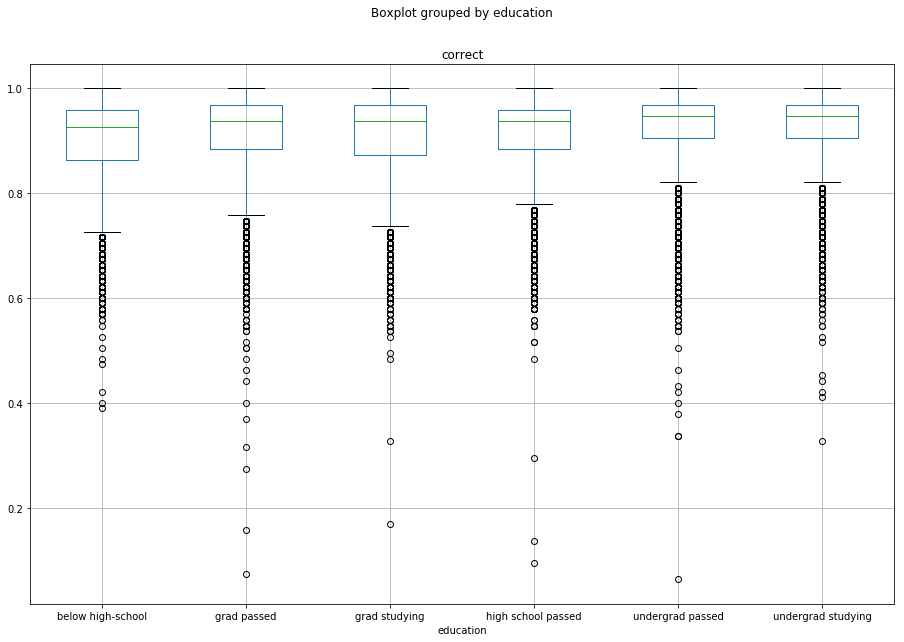

In [39]:
edu_data.boxplot(column='correct', by = 'education', figsize=(15,10))

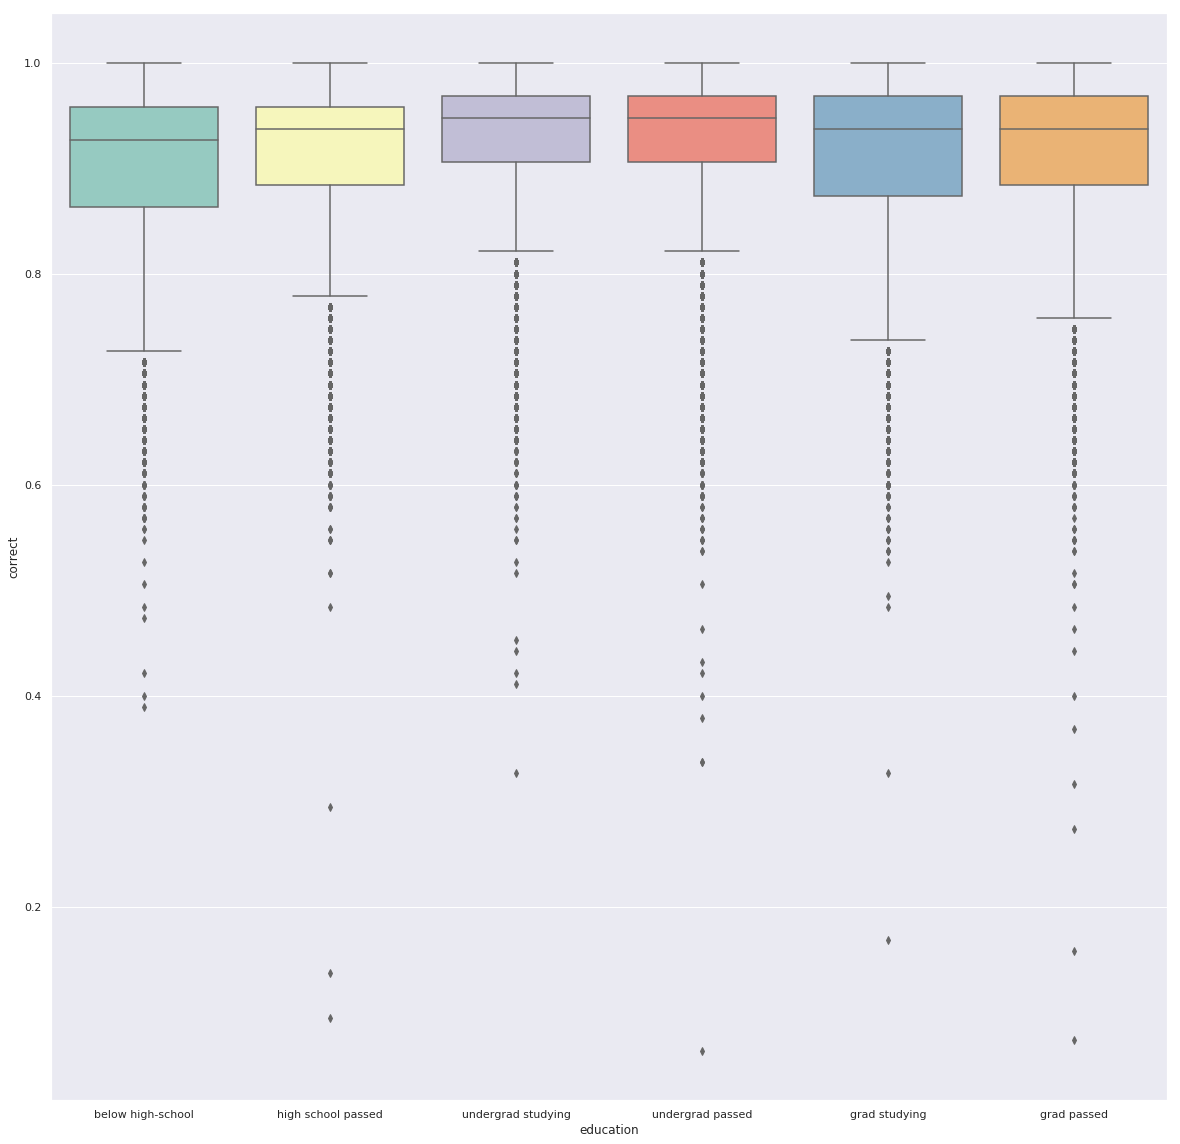

In [40]:
import seaborn as sns
sns.set(rc={'figure.figsize':(20,20)})
sns.boxplot(x="education", y="correct", data=edu_data, palette="Set3", order = ['below high-school', 'high school passed', 'undergrad studying', 'undergrad passed', 'grad studying', 'grad passed'])

In [41]:
non_natives['Eng_country_yrs'].value_counts()

0.0     224903
1.0      33694
2.0      13866
3.0       9131
4.0       6661
5.0       5864
6.0       3859
10.0      3443
7.0       3381
20.0      3122
8.0       2821
15.0      2522
18.0      2243
14.0      2161
17.0      2082
16.0      2064
22.0      2014
21.0      1957
12.0      1922
19.0      1902
25.0      1835
23.0      1787
13.0      1752
9.0       1689
24.0      1677
11.0      1395
30.0      1322
26.0      1269
28.0      1076
27.0      1005
         ...  
61.0       143
58.0       132
62.0       131
63.0       117
59.0       110
64.0       102
65.0        93
67.0        92
66.0        88
70.0        70
69.0        58
68.0        50
71.0        44
72.0        36
75.0        31
73.0        30
74.0        22
77.0        16
78.0        16
80.0        16
81.0        10
76.0         9
83.0         9
82.0         7
79.0         6
87.0         4
85.0         3
86.0         2
88.0         1
84.0         1
Name: Eng_country_yrs, Length: 89, dtype: int64

In [48]:
eng_country_data = non_natives[non_natives['Eng_country_yrs'] <= 60]

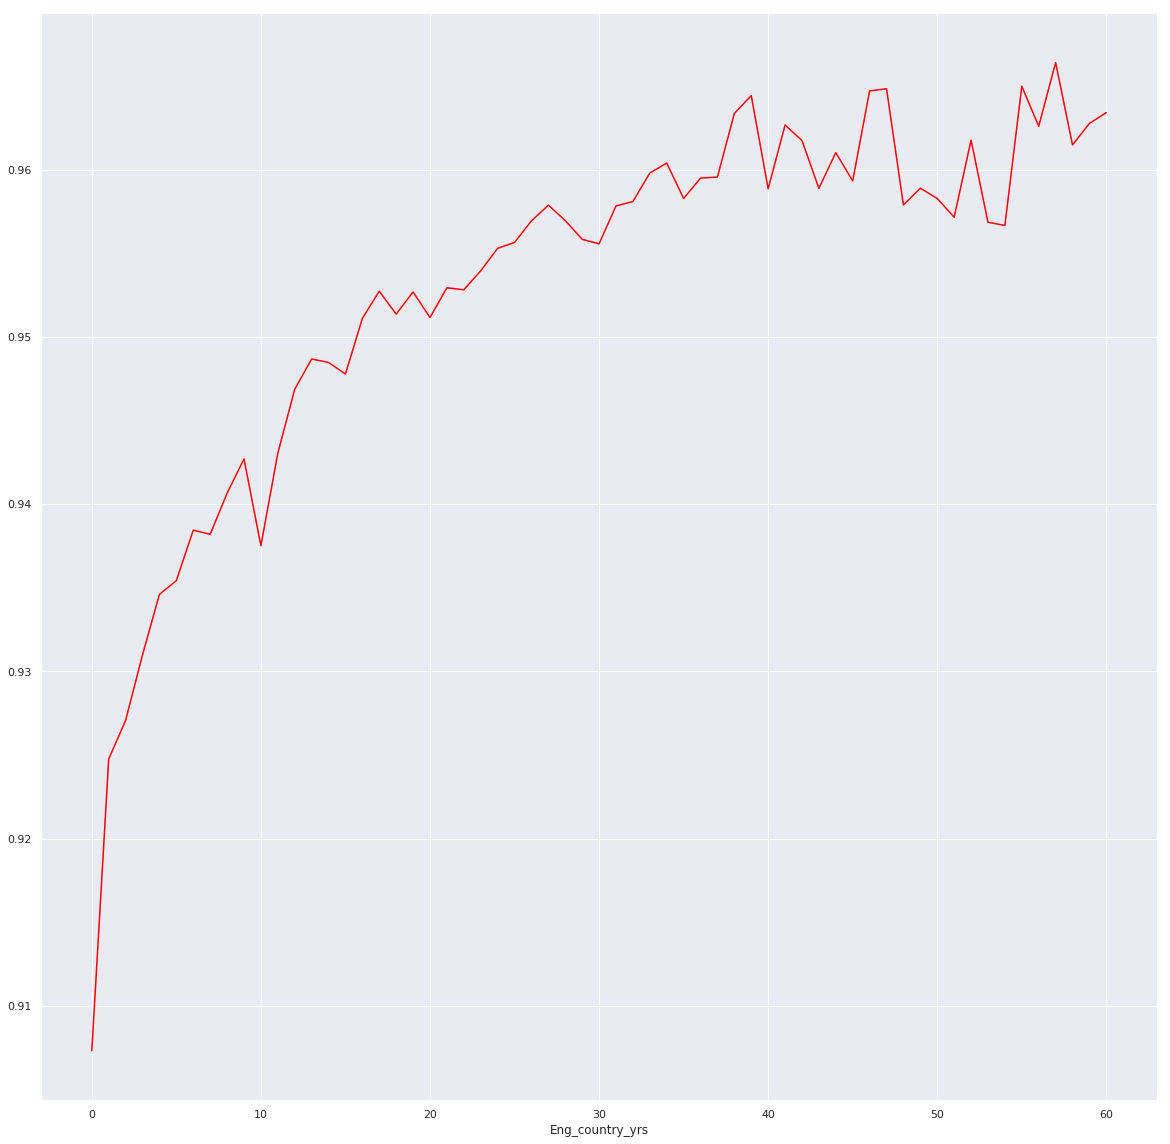

In [49]:
eng_country_data.groupby('Eng_country_yrs')['correct'].mean().plot( color = 'red')